<a href="https://colab.research.google.com/github/bryanMontoya/mlTalleres/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller 4.**



* Brayan Montoya Osorio
* Johjan Stiven Puerta Castaño


K-Means es una técnica de agrupamiento, perteneciente a modelos de aprendizaje no supervisado. El fin de este método es agrupar cada muestra en K grupos definidos por el usuario.

Por su parte el algoritmo de K-Means++, es una mejora al algoritmo de k-means, donde las semillas iniciales se eligen de forma de que estén lo más alejadas posible para evitar agrupamientos pobres.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist

# **Punto 1:**

Se procede a implementar diferentes técnicas de distancia:


Distancia euclidiana al cuadrado:

$$d(x,y) = \sum_{k = 1}^{n}(x_{k} - y_{k})^2$$

In [ ]:
def Euclid(m1, m2):
  n = len(m1)
  d = []
  for i in range(n):
    d.append((m1[i] - m2[i])**2)
  return (sum(d))**(1/2)

Distancia coseno:
$$d(x,y) = \frac{x*y}{||x|| ||y||}$$

In [ ]:
def distCos(m1, m2):
  m2t = np.transpose(m2)
  num = np.dot(m1, m2t)
  den = np.linalg.norm(m1)*np.linalg.norm(m2)
  if (den == 0):
    return 0
  return num/den

Distancia de correlación:
$$d(x,y) = \frac{\frac{1}{n}\sum_{k = 1}^{n}(x_{k}y_{k} - \mu_{x}\mu_{y} )}{\sigma_{x}\sigma_{y}}$$

In [ ]:
def correl(m1, m2):
  m1_mean = np.mean(m1)
  m2_mean = np.mean(m2)
  m1_desv = np.std(m1)
  m2_desv = np.std(m2)
  sumat = 0
  for i in range(len(m1)):
    sumat += m1[i]*m2[i]
  d = (sumat-m1_mean*m2_mean)/(m1_desv*m2_desv)
  return d

**Punto 2:**

El método de K-means++ es un algoritmo que se encarga de encontrar los centroides iniciales y entregarlos al modelo de K-means. Estos centroides se calculan a partir de las muestras que están más alejadas entre si y se hace uso de la distribución de probabilidad ponderada que se encarga de aumentar la probabilidad de escogencia para una distancia mayor. La ecuación de la distribución de probabilidad ponderada se muestra a continuación: 
$$\frac{d(\mu^{(p)}, M)^2}{\sum_{i}^{m}d(x^{(i)},M)^2}$$
\
Ahora se procede a programar el algoritmo de k-means++ y k-means:

In [ ]:
#Descripción: Funcióne encargada de encontrar las semillas(centroides) para el método de k-means.
def k_meanspp(k, features):
  cols = features.shape[1]
  M = np.zeros(shape = (k, cols))
  n = randint(0, len(features)-1) 
  M[0] = features[n]
  features = np.delete(features, n, axis = 0)
  for c in range(k-1):
    d = []
    for i in features:
      d.append(Euclid(M[c], i))
    pesos = []
    for j in d:
      pesos.append(j/sum(d))
    ind = pesos.index(max(pesos))
    M[c + 1] = features[ind]
    features = np.delete(features, ind, axis = 0)
  return M

In [ ]:
#Descripción: Funcióne encargada de encontrar los grupos óptimos para cada muestra.
def kmeans(centroides, distancia, features):
  d = []
  y_centroides = []  
  prom = []
  nuevosCentroides = []

  for e in range(10):     
    for f in range(len(features)):
      for c in range(len(centroides)):
        if (distancia == 1):
          d.append(Euclid(features[f], centroides[c]))             
        elif (distancia == 2):
          d.append(distCos(features[f], centroides[c]))
        elif (distancia == 3):
          d.append(correl(features[f], centroides[c]))

      centroide = centroides[d.index(min(d))]     
      y_centroides.append(centroide)      
      d = []    
        
    for c in range(len(centroides)):     
      for j in range(len(y_centroides)):      
        if (np.array_equal(centroides[c], y_centroides[j])):        
          prom.append(features[j].tolist())
              
      prom = np.array(prom)
      #Nuevo centroide:      
      u = np.mean(prom, axis = 0)
      nuevosCentroides.append(u)
      prom = []
    centroides = np.array(nuevosCentroides)
    nuevosCentroides = []
    if not (e == 9):
      y_centroides = []    
  return centroides, y_centroides 

# **Punto 3:**

Se procede a tomar la base de datos de Fashion_mnist. La cual se puede observar a continuación:

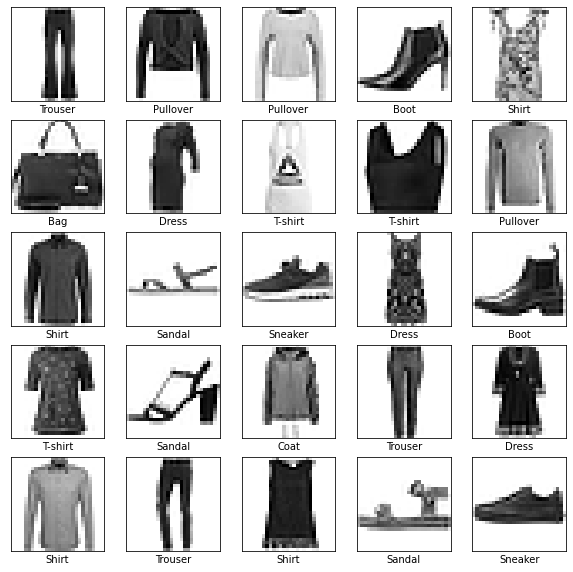

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data();

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n = randint(0, X_test.shape[0]-1)
  plt.imshow(X_test[n], cmap = plt.cm.binary) #Graficar imagenes
  plt.xlabel(class_names[y_test[n]])

In [ ]:
X_train = X_train.reshape(60000, -1) 
X_test = X_test.reshape(10000, -1)

X_train = X_train/255
X_test = X_test/255
X_test.shape

(10000, 784)

**Análisis de componentes principales PCA**


El análisis de componentes principales PCA, es un método usado para la reducción de la dimensionalidad, el cual ayuda a disminuir la carga computacional y de almacenamiento.

Este método consiste en transformar los datos para para proyectarlos en un uevo espacio vectorial.

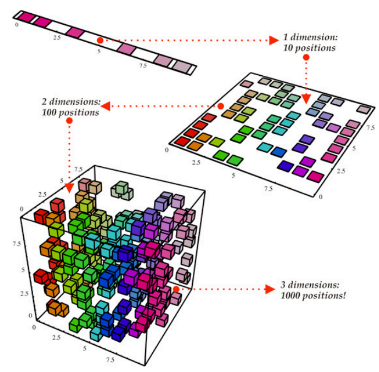 




A partir de las imágenes presentes en esta base de datos, se procede a aplicar PCA, para seleccionar las dos primeras componentes principales. Posteriormente se realiza un diagrama de dispersión con los datos en función de su clase. El proceso, se puede observar a contiuación:

In [ ]:
pca = PCA(n_components = 2)
X_testpca = pca.fit_transform(X_test)
componentes = pca.explained_variance_ratio_
print("Dos componentes principales: ",componentes)
print(X_testpca.shape)

Dos componentes principales:  [0.29166946 0.17640666]
(10000, 2)


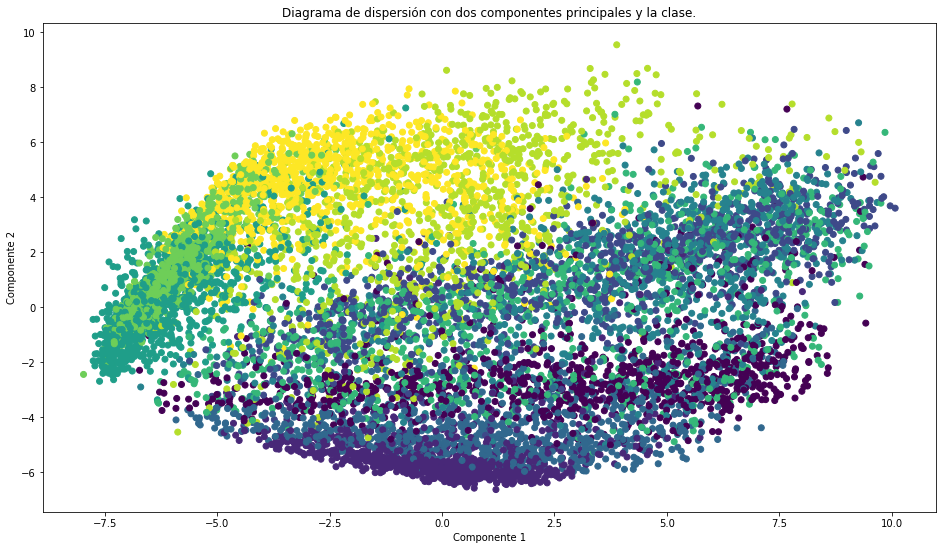

In [ ]:
xx = X_testpca[:,0]
yy = X_testpca[:,1]
plt.figure(figsize = (16,9))
plt.scatter(xx, yy, c = y_test);
plt.title("Diagrama de dispersión con dos componentes principales y la clase.");
plt.xlabel("Componente 1");
plt.ylabel("Componente 2");

Se toman los datos de test de fashion_mnist sin aplicar PCA. Posteriormente se prueban las funciones de k-means++ para encontrar las semillas y k-means para encontrar los grupos.

In [ ]:
centroides = k_meanspp(10, X_testpca)

In [ ]:
centroides, y_pred = kmeans(centroides, 1, X_testpca)

In [ ]:
zz = y_pred.copy()
for i in range(len(y_pred)):
  zz[i] = sum(y_pred[i])

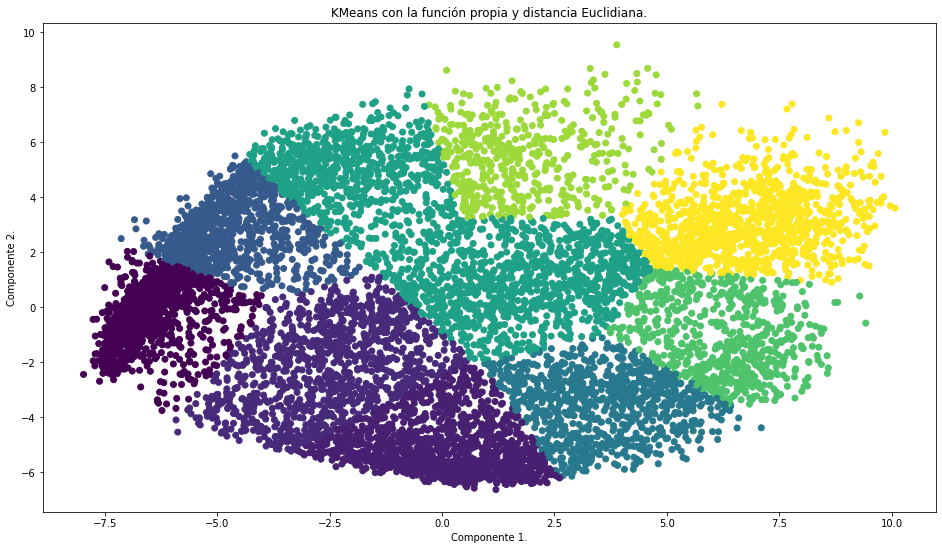

In [ ]:
xx = X_testpca[:,0]
yy = X_testpca[:,1]

plt.figure(figsize = (16,9));
plt.scatter(xx, yy, c = zz);
plt.title("KMeans con la función propia y distancia Euclidiana.");
plt.xlabel("Componente 1.");
plt.ylabel("Componente 2.");

**Punto 4:**

Se procede a probar el algoritmo de k-means de la libreria scikit-learn.

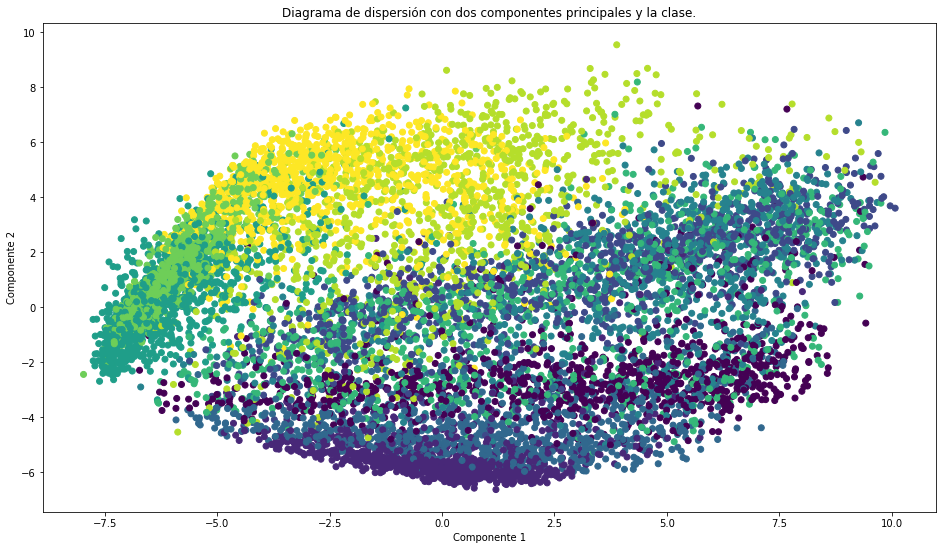

In [ ]:
xx = X_testpca[:,0]
yy = X_testpca[:,1]
plt.figure(figsize = (16,9))
plt.scatter(xx, yy, c = y_test);
plt.title("Diagrama de dispersión con dos componentes principales y la clase.");
plt.xlabel("Componente 1");
plt.ylabel("Componente 2");

In [ ]:
#K-Means con scikit learn.
k = 10
kmeans = KMeans(n_clusters = k, random_state=0)
kmeans.fit(X_testpca)
y_pred = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

array([[-0.37785487, -0.07429603],
       [ 7.09298698,  2.95192702],
       [-2.81957669,  4.70827334],
       [-6.44104214, -0.39937358],
       [ 0.92370046, -4.98175974],
       [ 3.67501746,  1.34712647],
       [-2.6495781 , -3.61766461],
       [-5.18070294,  2.10626168],
       [ 5.17421301, -2.68812961],
       [ 1.31257973,  5.27422915]])

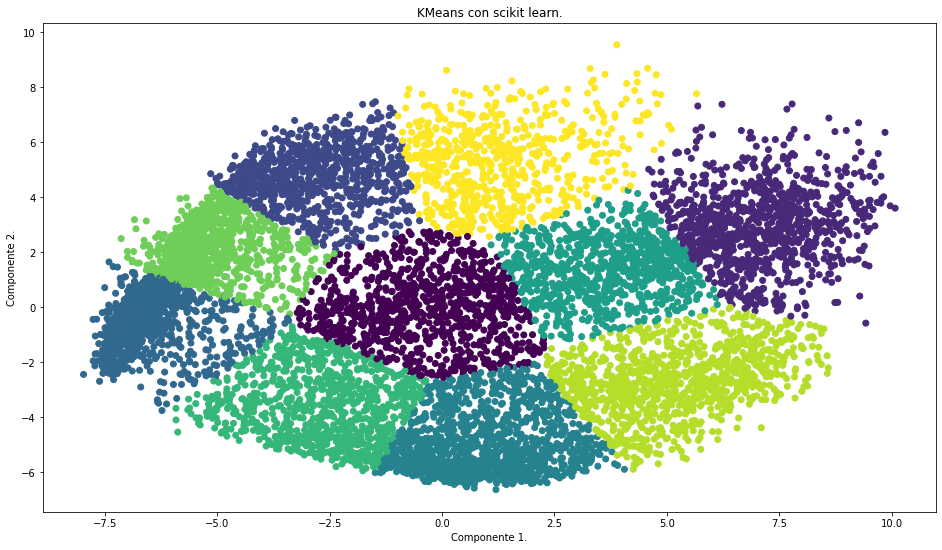

In [ ]:
xx = X_testpca[:,0]
yy = X_testpca[:,1]

plt.figure(figsize = (16,9));
plt.scatter(xx, yy, c = y_pred);
plt.title("K-Means con scikit learn.");
plt.xlabel("Componente 1.");
plt.ylabel("Componente 2.");